In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from dateutil.relativedelta import relativedelta
from datetime import datetime

test_date = datetime(2020,11,20,12,34,56)

In [5]:
test_date.strftime('%A')

'Friday'

In [15]:
df = pd.read_csv('weather_sample.csv',index_col='年月日',encoding='shift_jis',parse_dates=True)
df.resample('M').mean()

,平均気温(℃),降水量の合計(mm),日照時間(時間)
年月日,,,
2012-01-31,4.796774,1.612903,5.903226
2012-02-29,5.448276,3.241379,5.124138
2012-03-31,8.825806,4.661290,4.829032
2012-04-30,14.456667,3.950000,5.413333
2012-05-31,19.583871,7.451613,6.303226
...,...,...,...
2021-08-31,27.416129,12.338710,5.664516
2021-09-30,22.336667,7.416667,3.356667
2021-10-31,18.170968,6.435484,5.258065


In [12]:
df['曜日'] = df.index.strftime('%A')
df

,平均気温(℃),降水量の合計(mm),日照時間(時間),曜日
年月日,,,,
2012-01-01,5.7,0.0,3.3,Sunday
2012-01-02,6.0,0.0,4.6,Monday
2012-01-03,6.6,0.0,5.2,Tuesday
2012-01-04,5.4,0.0,7.7,Wednesday
2012-01-05,5.5,0.0,9.2,Thursday
...,...,...,...,...
2021-12-27,2.7,0.0,8.5,Monday
2021-12-28,3.8,0.0,8.8,Tuesday
2021-12-29,4.2,0.0,7.8,Wednesday


In [14]:
df.groupby('曜日').mean()

,平均気温(℃),降水量の合計(mm),日照時間(時間)
曜日,,,
Friday,16.543295,4.011494,5.747701
Monday,16.630651,5.058429,5.343678
Saturday,16.429942,5.152591,5.564875
Sunday,16.490230,4.806513,5.673563
Thursday,16.515517,4.392720,5.400958
Tuesday,16.689464,4.395594,5.507854
Wednesday,16.526054,4.653257,5.311686


In [17]:
df

,平均気温(℃),降水量の合計(mm),日照時間(時間)
年月日,,,
2012-01-01,5.7,0.0,3.3
2012-01-02,6.0,0.0,4.6
2012-01-03,6.6,0.0,5.2
2012-01-04,5.4,0.0,7.7
2012-01-05,5.5,0.0,9.2
...,...,...,...
2021-12-27,2.7,0.0,8.5
2021-12-28,3.8,0.0,8.8
2021-12-29,4.2,0.0,7.8


<AxesSubplot:xlabel='年月日'>

findfont: Font family ['shift-jis'] not found. Falling back to DejaVu Sans.
findfont: Font family ['shift-jis'] not found. Falling back to DejaVu Sans.
c:\Users\hahih\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\hahih\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\hahih\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\hahih\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\hahih\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22343 missing from current font.
  font.set

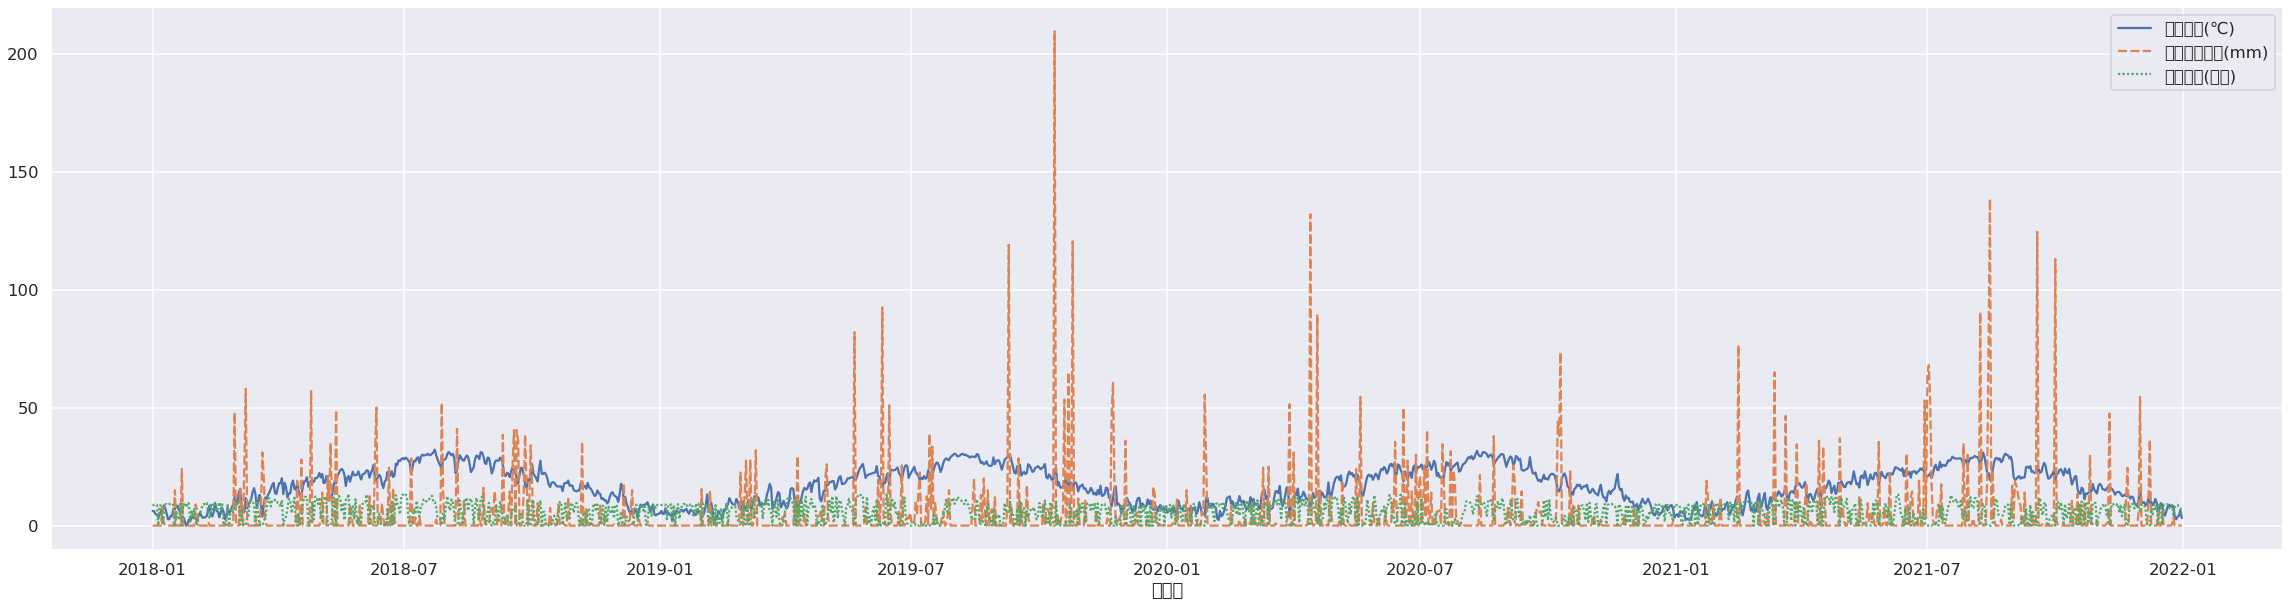

In [20]:
sns.set(context='talk',font='shift-jis')
fig = plt.subplots(figsize=(40,10))
sns.lineplot(data=df['2018':])

In [29]:
df['平均気温(℃)_差分'] = df['平均気温(℃)'].diff(1)
df['平均気温(℃)_変化率'] = df['平均気温(℃)'].pct_change()#.map('{:.1%}'.format)
df['平均気温(℃)_ずらし'] = df['平均気温(℃)'].shift()
df['平均気温(℃)_移動平均'] = df['平均気温(℃)'].rolling(7,min_periods=1).mean()
df

,平均気温(℃),降水量の合計(mm),日照時間(時間),平均気温(℃)_差分,平均気温(℃)_変化率,平均気温(℃)_ずらし,平均気温(℃)_移動平均
年月日,,,,,,,
2012-01-01,5.7,0.0,3.3,NaN,NaN,NaN,5.700000
2012-01-02,6.0,0.0,4.6,0.3,0.052632,5.7,5.850000
2012-01-03,6.6,0.0,5.2,0.6,0.100000,6.0,6.100000
2012-01-04,5.4,0.0,7.7,-1.2,-0.181818,6.6,5.925000
2012-01-05,5.5,0.0,9.2,0.1,0.018519,5.4,5.840000
...,...,...,...,...,...,...,...
2021-12-27,2.7,0.0,8.5,-0.8,-0.228571,3.5,6.828571
2021-12-28,3.8,0.0,8.8,1.1,0.407407,2.7,6.200000
2021-12-29,4.2,0.0,7.8,0.4,0.105263,3.8,5.542857


In [31]:
df2 = pd.read_csv('weather_sample2.csv',index_col='年月日',encoding='shift_jis',parse_dates=True)
df2.head(20)

,平均気温(℃),降水量の合計(mm),日照時間(時間),平均気温(℃)仮
年月日,,,,
2012-01-01,5.7,0.0,3.3,5.7
2012-01-02,6.0,0.0,4.6,6.0
2012-01-03,6.6,0.0,5.2,NaN
2012-01-04,5.4,0.0,7.7,5.4
2012-01-05,5.5,0.0,9.2,5.5
2012-01-06,6.3,0.0,5.9,6.3
2012-01-07,5.7,0.0,9.1,NaN
2012-01-08,5.8,0.0,8.2,5.8
2012-01-09,5.9,0.0,9.0,5.9


In [36]:
# df2['平均気温(℃)_欠損値交換'] = df2['平均気温(℃)仮'].fillna(method='bfill')
df2['平均気温(℃)_欠損値交換'] = df2['平均気温(℃)仮'].interpolate()
df2.head(20)


,平均気温(℃),降水量の合計(mm),日照時間(時間),平均気温(℃)仮,平均気温(℃)_欠損値交換
年月日,,,,,
2012-01-01,5.7,0.0,3.3,5.7,5.70
2012-01-02,6.0,0.0,4.6,6.0,6.00
2012-01-03,6.6,0.0,5.2,NaN,5.70
2012-01-04,5.4,0.0,7.7,5.4,5.40
2012-01-05,5.5,0.0,9.2,5.5,5.50
2012-01-06,6.3,0.0,5.9,6.3,6.30
2012-01-07,5.7,0.0,9.1,NaN,6.05
2012-01-08,5.8,0.0,8.2,5.8,5.80
2012-01-09,5.9,0.0,9.0,5.9,5.90


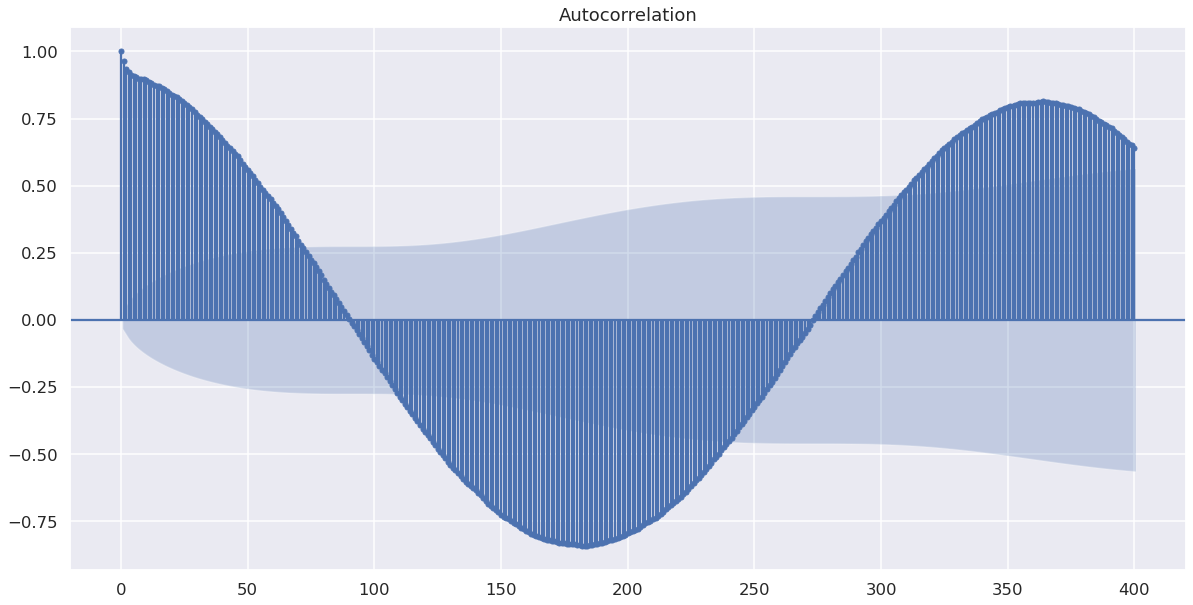

In [43]:
import statsmodels.api as sm #自己相関を見つける

plt.rc('figure', figsize=(20,10))
res = sm.graphics.tsa.plot_acf(df['平均気温(℃)'], lags=400)

In [46]:
sm.tsa.stattools.acf(df['平均気温(℃)'], nlags=365)[365]

0.8126526987087334

C:\Users\hahih\AppData\Local\Temp/ipykernel_13008/2807071718.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  sm.tsa.seasonal_decompose(df['平均気温(℃)'].values, freq=365).plot()


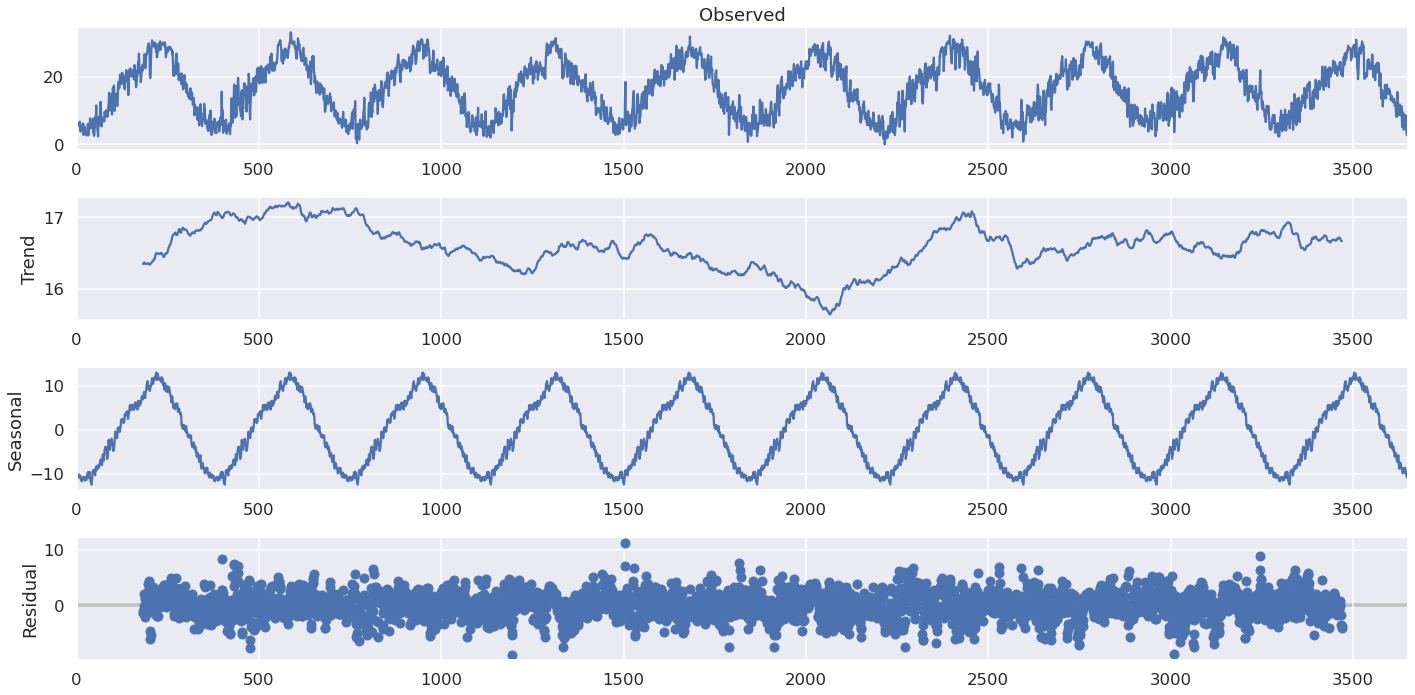

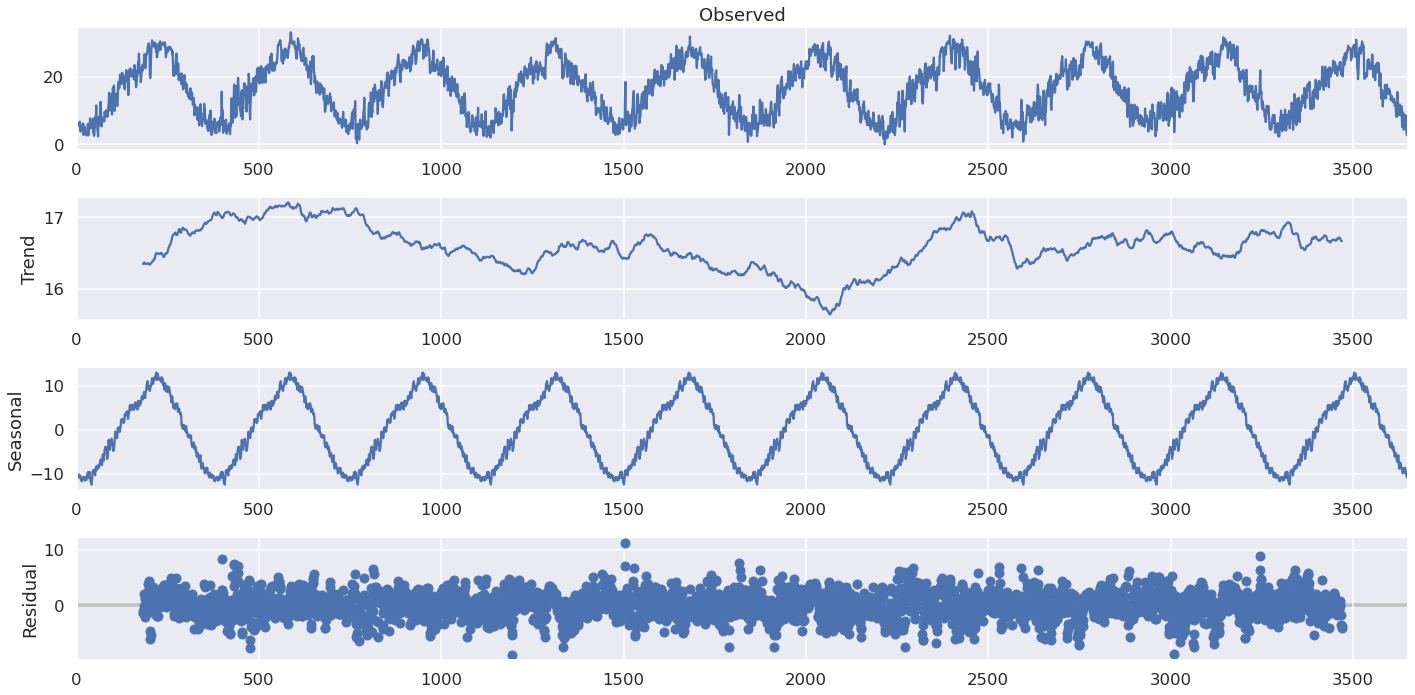

In [47]:
sm.tsa.seasonal_decompose(df['平均気温(℃)'].values, freq=365).plot()